# Genetic Algorithm Demonstration 

This notebook demonstrates a basic implementation of a Genetic Algorithm (GA).

## Problem statement

Given a set of points in 2D space, determine the polygon that maximises the ratio of its area to the square of its perimeter. This ratio serves as a measure of compactness, which is often desirable in various fields such as materials science, biology, and urban planning. Compact shapes can lead to more efficient designs, reduced material usage, and optimised spatial arrangements. The ratio of area to the square of the perimeter, $\text{Area} / \text{Perimeter}^2$, is a measure of the compactness or efficiency of a shape.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate random points

Start by generating random points.

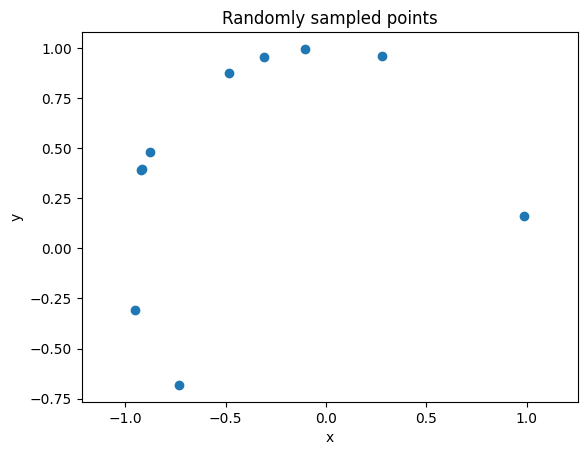

In [2]:
from point import Point
np.random.seed(2) # 3

n_points = 10
# points = [Point(np.random.rand(), np.random.rand()) for _ in range(n_points)]

# Generate n_points on the perimeter of a circle
points = []
for _ in range(n_points):
    theta = np.random.rand() * 2 * np.pi
    x = np.cos(theta)
    y = np.sin(theta)
    points.append(Point(x, y))

x = [point.x for point in points]
y = [point.y for point in points]
plt.plot(x, y, 'o')
plt.title('Randomly sampled points')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

## 2. Sample a polygon and determine the fitness

Randomly sample a polygon and determine the fitness score: $\text{Area} / \text{Perimeter}^2$.

Fitness score: 0.0124


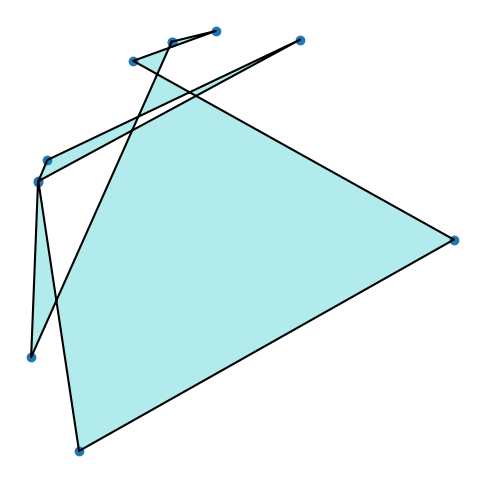

In [3]:
import random
from polygon import Polygon

random.shuffle(points)
polygon = Polygon(points)
polygon.plot()
print(f"Fitness score: {polygon.fitness():.4f}")

## 3. Generate the initial population of polygons

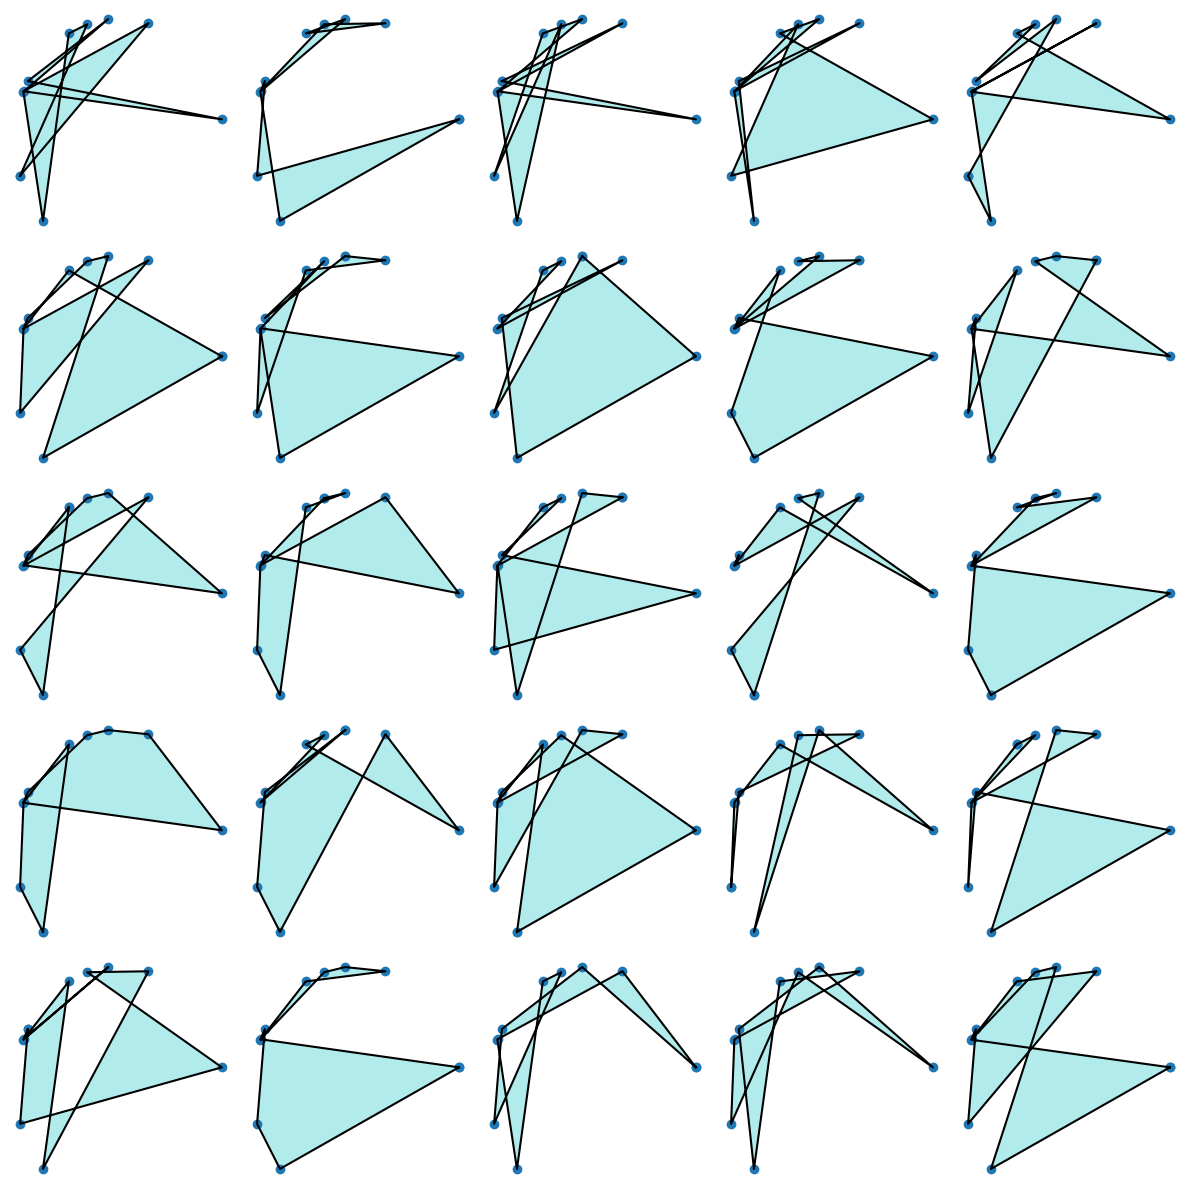

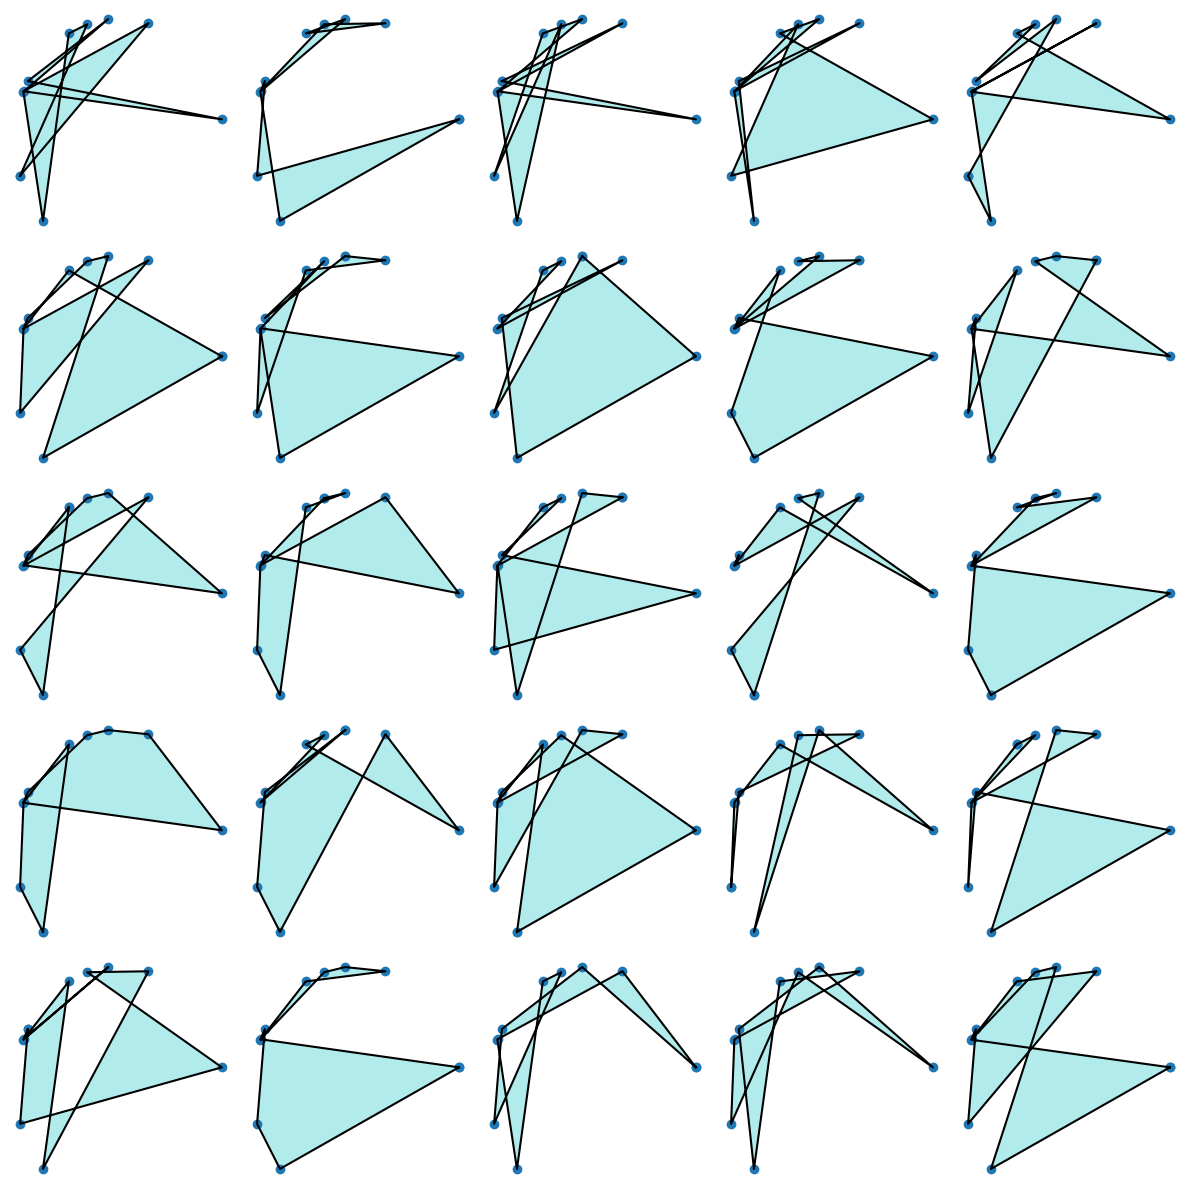

In [4]:
from pyga import Population

population_size = 25
individuals = [Polygon(np.random.permutation(points)) for _ in range(population_size)]
population = Population(individuals)
population.plot()

## 4. Initiate the genetic algorithm

In [5]:
from pyga import GeneticAlgorithm

ga = GeneticAlgorithm(population, num_generations=100, num_parents=4, mutation_probability=0.05, animate=True)

## 5. Perform the evolution

Run the genetic algorithm to evolve the population towards optimal solutions.

Evolution: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.51it/s]


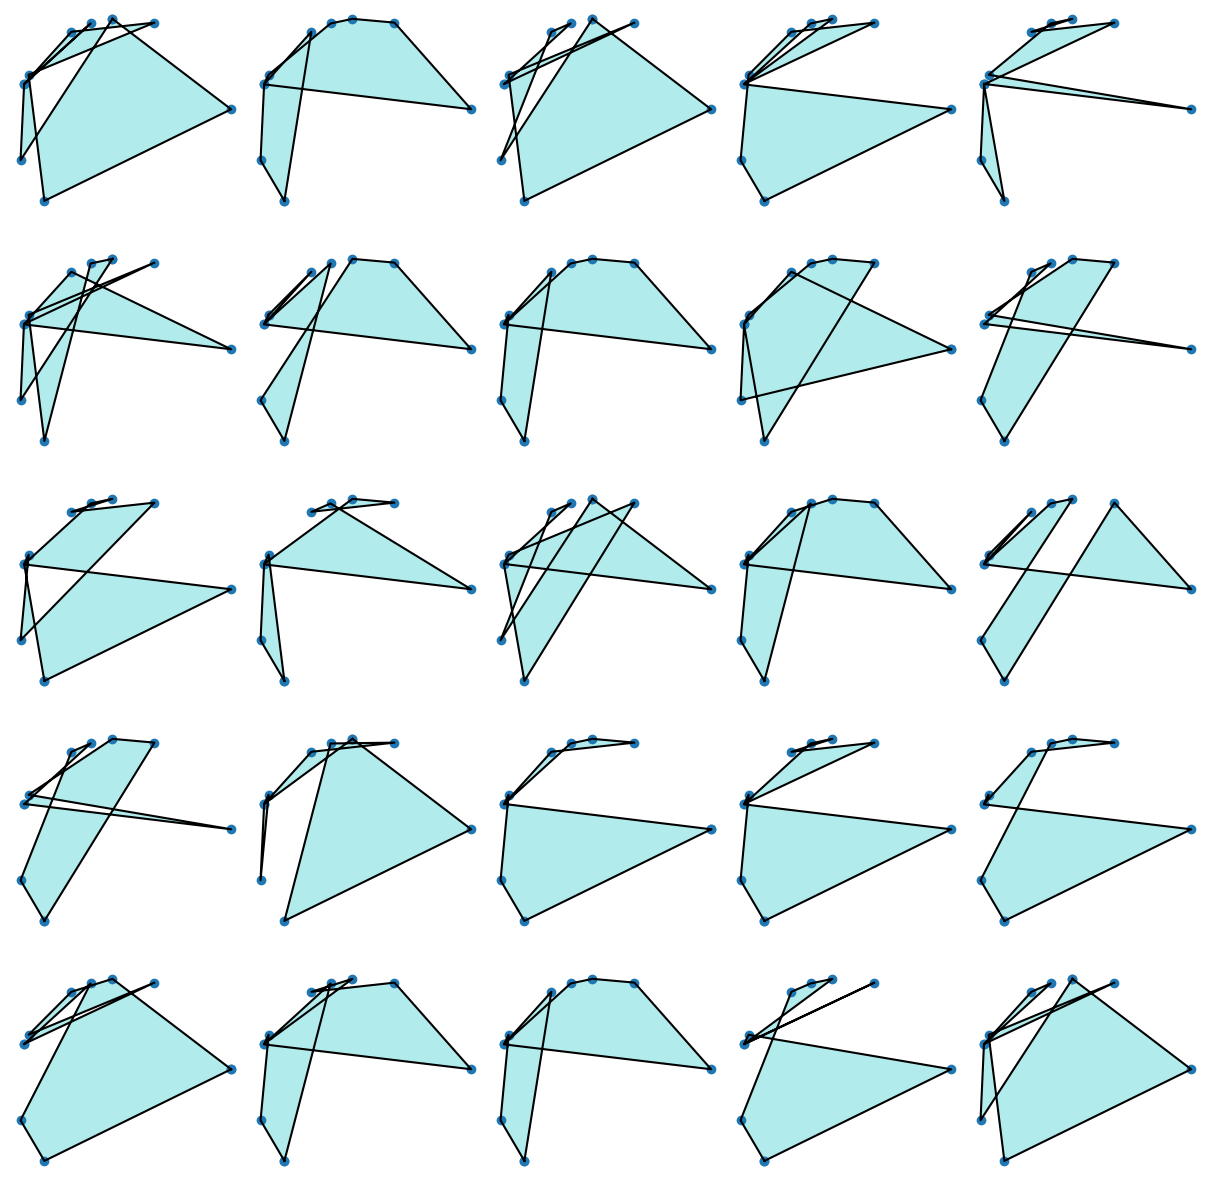

In [6]:
ga.evolve()

## 6. Plot the evolution of the fitness metric.

Plot the evolution of the fitness metric over the generations to observe the improvement. During the evolution process, the fitness of the population improves as the genetic algorithm selects the best individuals for reproduction and introduces variations through crossover and mutation. The fitness jumps, or significant improvements, typically occur when a beneficial mutation or crossover combination creates a notably better individual. These jumps are often followed by periods of gradual improvement as the algorithm refines the solutions. This dynamic illustrates the balance between exploration (discovering new solutions) and exploitation (refining existing solutions) in the genetic algorithm.

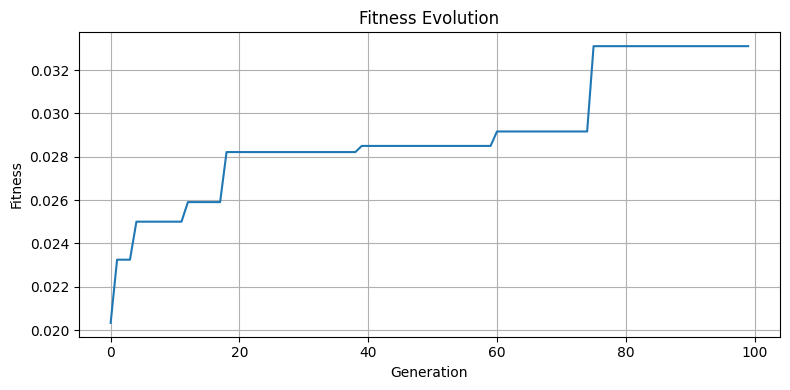

In [7]:
ga.plot_fitness()

## 7. Plot the final population 

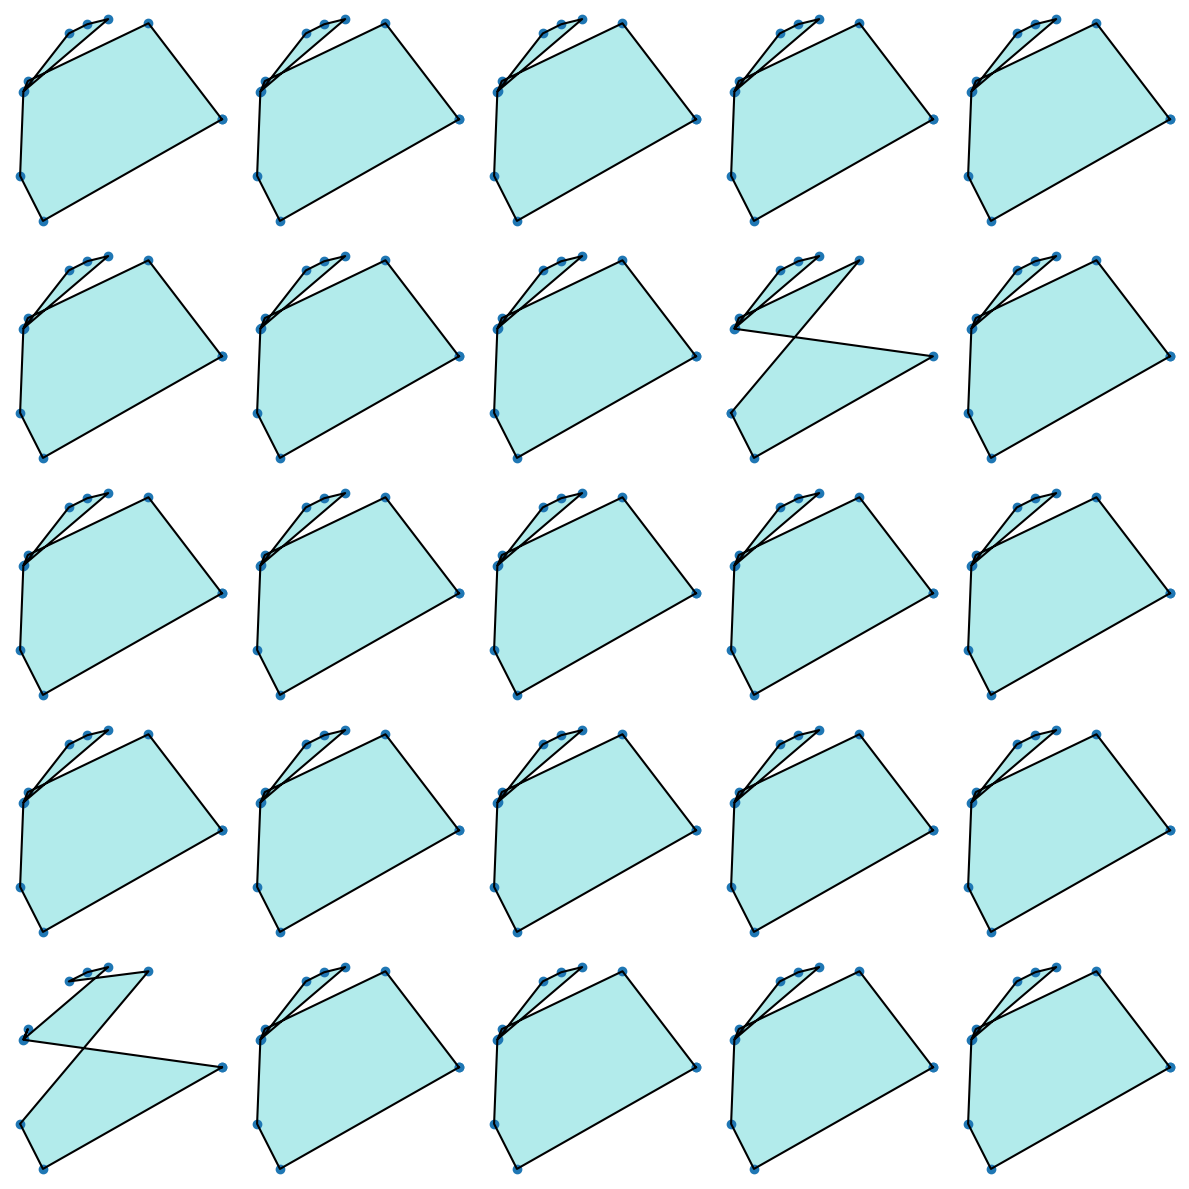

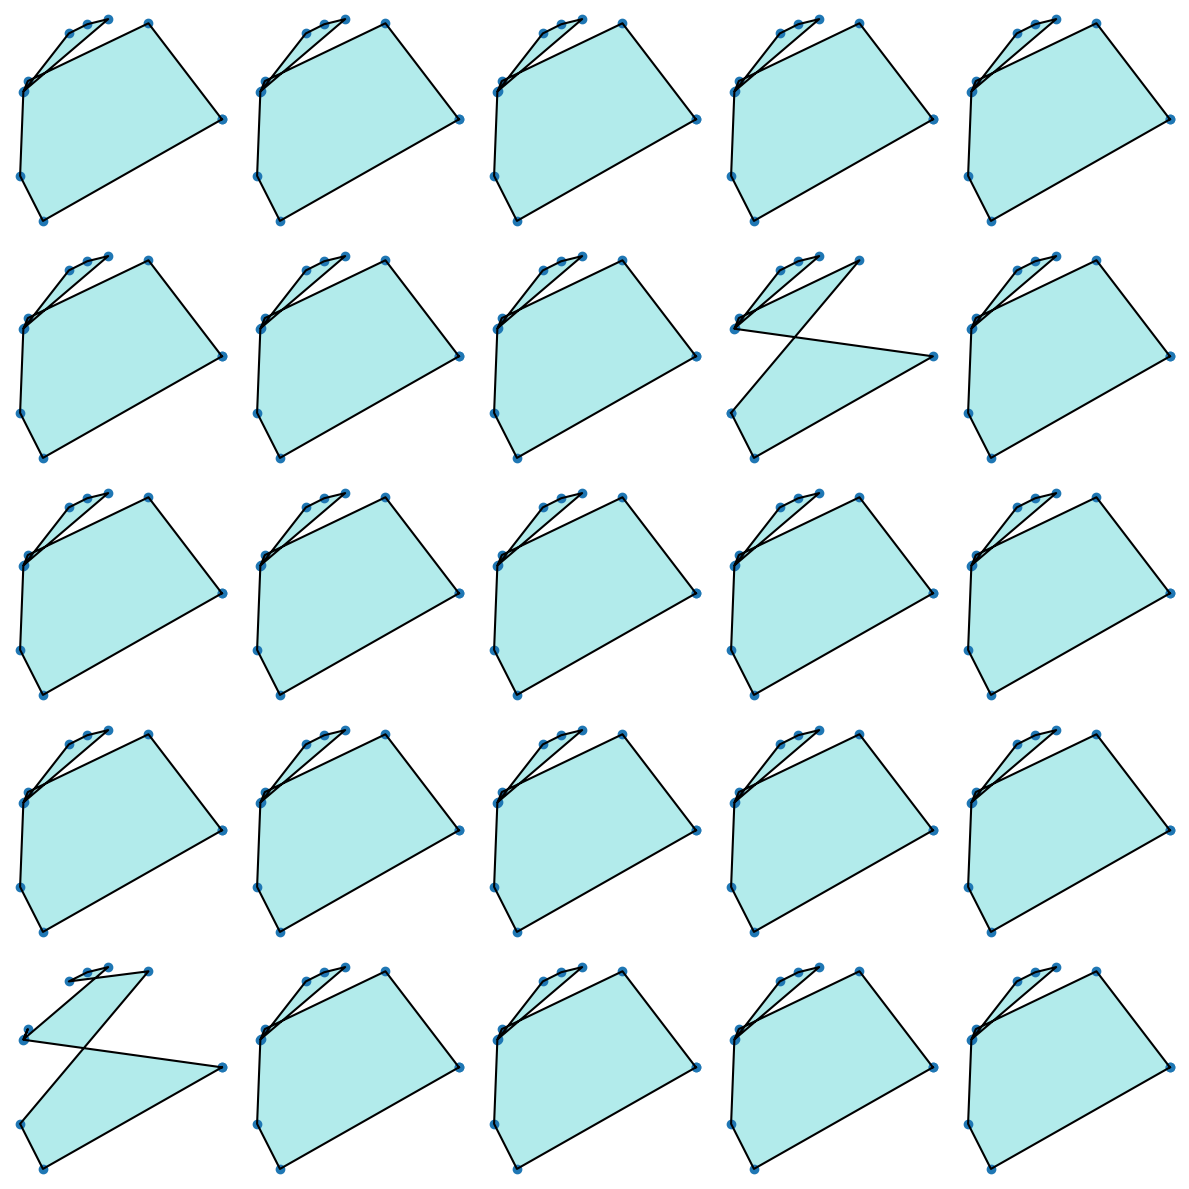

In [8]:
ga.population.plot()